In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
%matplotlib inline

In [2]:
filename = "/Users/arefindk/Desktop/github_merged_pull/trimmed_merged_pull_users_strong_int_with_communities.graphml"
G = nx.read_graphml(filename)

In [3]:
community_sizes_lang = Counter(nx.get_node_attributes(G,'lang').values())
print community_sizes_lang
max_community_size_lang = max(community_sizes_lang.values())
print max_community_size_lang

Counter({u'JavaScript': 13512, u'Python': 9246, u'Ruby': 8627, u'PHP': 4672, u'Java': 4435, u'C': 2124, u'C++': 1630, u'Objective-C': 1374, u'C#': 1342, u'Go': 1196, u'Shell': 763, u'Perl': 750, u'Scala': 622, u'Haskell': 557, u'Clojure': 521, u'CSS': 481, u'Emacs Lisp': 289, u'R': 250, u'Erlang': 241, u'Lua': 236, u'Rust': 213, u'VimL': 195, u'CoffeeScript': 194, u'Groovy': 190, u'HTML': 180, u'Puppet': 130, u'OCaml': 124, u'Julia': 100, u'DM': 87, u'Common Lisp': 86, u'Swift': 84, u'D': 83, u'F#': 82, u'Dart': 81, u'TeX': 76, u'Haxe': 66, u'Elixir': 59, u'ActionScript': 43, u'ColdFusion': 31, u'Racket': 26, u'PowerShell': 23, u'TypeScript': 22, u'Makefile': 22, u'Scheme': 22, u'Matlab': 21, u'Perl6': 20, u'Arduino': 15, u'Pascal': 15, u'Nimrod': 14, u'Logos': 13, u'XQuery': 13, u'Coq': 12, u'Assembly': 11, u'FORTRAN': 10, u'Elm': 9, u'Visual Basic': 8, u'Smalltalk': 8, u'Kotlin': 7, u'XSLT': 7, u'Rebol': 6, u'Standard ML': 6, u'SQF': 6, u'Eiffel': 6, u'Vala': 6, u'LiveScript': 6, u'D

In [4]:
community_sizes_infomap = Counter(nx.get_node_attributes(G,'infomap_community').values())
print community_sizes_infomap
max_community_size_infomap = max(community_sizes_infomap.values())
print max_community_size_infomap

Counter({0: 12609, 1: 11719, 2: 5034, 3: 4277, 5: 3167, 4: 2718, 6: 2310, 7: 1548, 8: 1122, 12: 869, 10: 818, 11: 781, 9: 756, 13: 514, 19: 509, 15: 411, 14: 361, 18: 338, 16: 335, 22: 308, 24: 231, 21: 227, 20: 223, 17: 221, 27: 215, 23: 169, 25: 169, 33: 168, 30: 165, 34: 161, 29: 154, 31: 143, 32: 129, 36: 118, 28: 117, 26: 112, 51: 99, 42: 94, 45: 93, 44: 86, 37: 81, 38: 75, 41: 74, 47: 73, 35: 69, 53: 68, 54: 64, 49: 60, 50: 59, 48: 57, 63: 57, 64: 56, 57: 55, 46: 53, 39: 52, 40: 52, 74: 47, 59: 44, 55: 43, 52: 40, 58: 39, 61: 38, 43: 37, 60: 37, 65: 35, 68: 35, 62: 34, 69: 33, 67: 29, 56: 28, 83: 27, 81: 24, 70: 23, 80: 23, 84: 21, 82: 20, 73: 18, 77: 17, 66: 16, 71: 16, 72: 16, 85: 13, 86: 13, 75: 12, 76: 12, 78: 12, 87: 10, 88: 9, 79: 8, 89: 7, 90: 7, 92: 6, 91: 5})
12609


In [5]:
community_sizes_louvain = Counter(nx.get_node_attributes(G,'louvain_community').values())
print community_sizes_louvain
max_community_size_louvain = max(community_sizes_louvain.values())
print max_community_size_louvain

Counter({8: 8281, 2: 7175, 6: 4602, 3: 4110, 1: 3494, 16: 2968, 7: 2572, 18: 2480, 0: 1929, 14: 1887, 17: 1553, 13: 1413, 4: 1394, 5: 1366, 10: 1310, 9: 1161, 22: 707, 11: 578, 15: 536, 21: 425, 31: 402, 24: 376, 34: 350, 25: 335, 27: 309, 37: 265, 20: 259, 28: 243, 12: 233, 23: 224, 26: 216, 19: 195, 39: 179, 32: 168, 43: 163, 35: 155, 33: 153, 38: 153, 36: 148, 40: 144, 30: 120, 29: 96, 45: 73, 49: 70, 48: 61, 44: 46, 41: 36, 51: 36, 52: 34, 42: 26, 55: 26, 59: 22, 47: 21, 57: 18, 53: 14, 56: 14, 46: 12, 60: 12, 61: 12, 62: 12, 66: 10, 68: 10, 54: 8, 50: 7, 67: 7, 58: 6, 63: 6, 64: 5, 70: 5, 71: 5, 73: 5, 65: 4, 72: 4, 69: 3})
8281


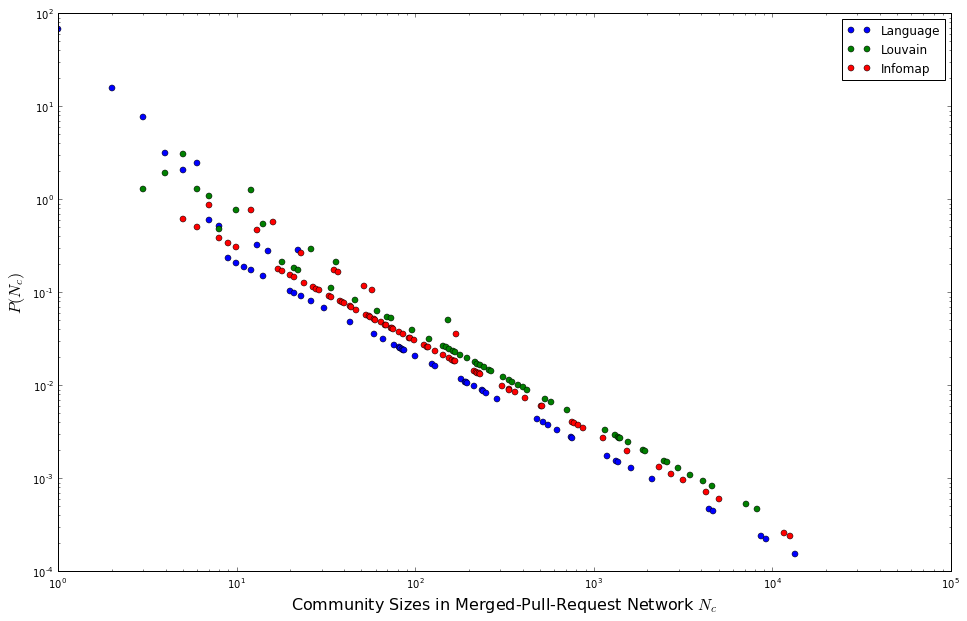

In [6]:
component_min = 1
component_max = max(max_community_size_lang, max_community_size_infomap, max_community_size_louvain)

## Taking number of bins to be 1/5th of the maximum component size 
bin_edges = np.logspace(np.log10(component_min), np.log10(component_max), num = int(component_max/float(5)))
density_lang, _ = np.histogram(community_sizes_lang.values(), bins=bin_edges, density=True)
density_louvain, _ = np.histogram(community_sizes_louvain.values(), bins=bin_edges, density=True)
density_infomap, _ = np.histogram(community_sizes_infomap.values(), bins=bin_edges, density=True)

fig = plt.figure(figsize=(16,10))
plt.loglog(bin_edges[:-1], density_lang, marker='o', linestyle='none')
plt.loglog(bin_edges[:-1], density_louvain, marker='o', linestyle='none')
plt.loglog(bin_edges[:-1], density_infomap, marker='o', linestyle='none')

plt.xlabel(r"Community Sizes in Merged-Pull-Request Network $N_{c}$", fontsize=16)
plt.ylabel(r"$P(N_{c})$", fontsize=16)

plt.legend([r'Language',r'Louvain',r'Infomap'], loc='upper right')
plt.show()